In [8]:
import pandas as pd

# Cargar todas las hojas del archivo
excel_file = "FIIS(2020-2024).xlsx"
xls = pd.ExcelFile(excel_file)
all_sheets = xls.sheet_names

# Leer y combinar todas las hojas
df_list = []
for sheet in all_sheets:
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet)
    df_sheet["CICLO"] = sheet  # Agregamos una columna con el nombre del ciclo
    df_list.append(df_sheet)

# Concatenar todo en un solo DataFrame
df = pd.concat(df_list, ignore_index=True)

# Verificar
df.head(99)

N° CODCUR                           CURSO SECCIÓN  \
0    1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
1    2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
2    3  SI405   MODELADO CONCEPTUAL DE DATOS        W   
3    4  SI505        DISEÑO DE BASE DE DATOS        U   
4    5  SI505        DISEÑO DE BASE DE DATOS        V   
5    1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
6    2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
7    3  SI505        DISEÑO DE BASE DE DATOS        U   
8    4  SI505        DISEÑO DE BASE DE DATOS        V   
9    1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
10   2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
11   3  SI505        DISEÑO DE BASE DE DATOS        U   
12   4  SI505        DISEÑO DE BASE DE DATOS        V   
13   1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
14   2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
15   3  SI505        DISEÑO DE BASE DE DATOS        U   
16   4  SI505        DISEÑO DE BASE DE DATOS        V   
17   1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
18   2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
19   3  SI505        DISEÑO DE BASE DE DATOS        U   
20   4  SI505        DISEÑO DE BASE DE DATOS        V   
21   1  SI405   MODELADO CONCEPTUAL DE DATOS        U   
22   2  SI405   MODELADO CONCEPTUAL DE DATOS        V   
23   3  SI405   MODELADO CONCEPTUAL DE DATOS        W   
24   4  SI505        DISEÑO DE BASE DE DATOS        U   
25   5  SI505        DISEÑO DE BASE DE DATOS        V   

                         PROFESOR  VACANTES  MATRICULADOS  \
0   REYNA-MONTEVERDE-TINO EDUARDO        15             6   
1   REYNA-MONTEVERDE-TINO EDUARDO        15            15   
2     RODRIGUEZ-RAFAEL-GLEN DARIO        16            16   
3   REYNA-MONTEVERDE-TINO EDUARDO        30            19   
4    CABALLERO-ORTIZ-JOSE ALBERTO        35            35   
5   REYNA-MONTEVERDE-TINO EDUARDO        35            28   
6     RODRIGUEZ-RAFAEL-GLEN DARIO        35            34   
7   REYNA-MONTEVERDE-TINO EDUARDO        25            14   
8    CABALLERO-ORTIZ-JOSE ALBERTO        30            29   
9   REYNA-MONTEVERDE-TINO EDUARDO        30            21   
10    RODRIGUEZ-RAFAEL-GLEN DARIO        32            31   
11  REYNA-MONTEVERDE-TINO EDUARDO        32            25   
12   CABALLERO-ORTIZ-JOSE ALBERTO        33            33   
13  REYNA-MONTEVERDE-TINO EDUARDO        36            32   
14    RODRIGUEZ-RAFAEL-GLEN DARIO        40            40   
15  REYNA-MONTEVERDE-TINO EDUARDO        25            24   
16   CABALLERO-ORTIZ-JOSE ALBERTO        30            29   
17  REYNA-MONTEVERDE-TINO EDUARDO        43            41   
18    RODRIGUEZ-RAFAEL-GLEN DARIO        46            46   
19  REYNA-MONTEVERDE-TINO EDUARDO        35            24   
20   CABALLERO-ORTIZ-JOSE ALBERTO        38            38   
21  REYNA-MONTEVERDE-TINO EDUARDO        40            19   
22    RODRIGUEZ-RAFAEL-GLEN DARIO        41            41   
23  REYNA-MONTEVERDE-TINO EDUARDO        40            35   
24  REYNA-MONTEVERDE-TINO EDUARDO        40            32   
25   CABALLERO-ORTIZ-JOSE ALBERTO        41            40   

    CANT. R. PARCIAL (RP)  CANT. R. TOTAL (RT)  CANT. REG. (RW)  CANT. APROB.  \
0                       2                    0                0             2   
1                       3                    0                0             5   
2                       0                    0                0            13   
3                       4                    0                0             6   
4                       0                    0                0            32   
5                       1                    0                0            13   
6                       0                    0                0            32   
7                       2                    0                0             5   
8                       1                    0                0            26   
9     

In [10]:
# Agrupar por profesor y calcular promedio de matriculados y aprobados
prof_stats = df.groupby("PROFESOR")[["MATRICULADOS", "CANT. APROB."]].mean().reset_index()

# Renombrar columnas
prof_stats = prof_stats.rename(columns={
    "MATRICULADOS": "PROM_MATRICULADOS",
    "CANT. APROB.": "PROM_APROBADOS"
})

prof_stats.head()

PROFESOR  PROM_MATRICULADOS  PROM_APROBADOS
0   CABALLERO-ORTIZ-JOSE ALBERTO          34.000000       30.333333
1  REYNA-MONTEVERDE-TINO EDUARDO          23.928571        8.500000
2    RODRIGUEZ-RAFAEL-GLEN DARIO          34.666667       32.333333

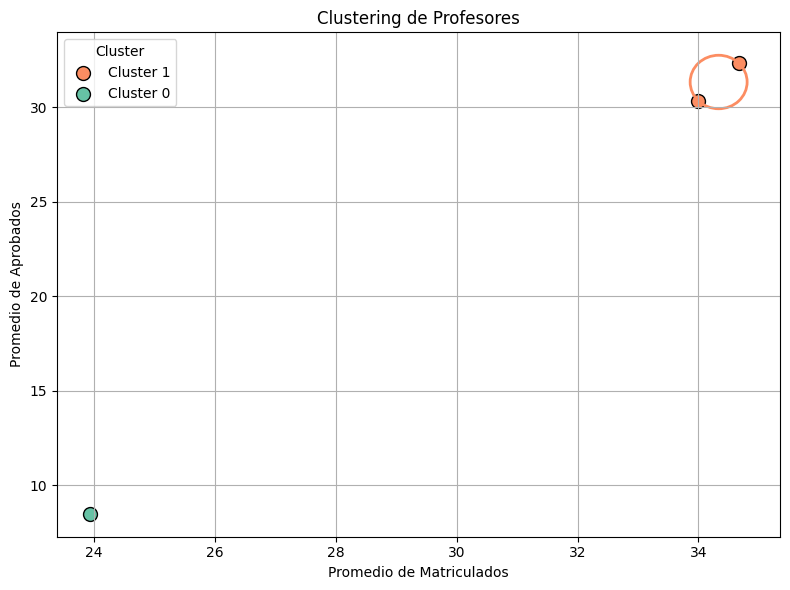

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

# 1. Agrupar por profesor y calcular promedios
prof_stats = df.groupby("PROFESOR")[["MATRICULADOS", "CANT. APROB."]].mean().reset_index()

# 2. Renombrar columnas
prof_stats = prof_stats.rename(columns={
    "MATRICULADOS": "PROM_MATRICULADOS",
    "CANT. APROB.": "PROM_APROBADOS"
})

# 3. Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(prof_stats[["PROM_MATRICULADOS", "PROM_APROBADOS"]])

# 4. Aplicar KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
prof_stats["CLUSTER"] = kmeans.fit_predict(scaled_data)

# 5. Visualización
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2", n_colors=3)

for cluster_id in prof_stats["CLUSTER"].unique():
    cluster_data = prof_stats[prof_stats["CLUSTER"] == cluster_id]
    plt.scatter(cluster_data["PROM_MATRICULADOS"], cluster_data["PROM_APROBADOS"],
                s=100, label=f"Cluster {cluster_id}", color=palette[cluster_id], edgecolor='black')

    # Dibujar elipse alrededor del cluster
    x_mean = cluster_data["PROM_MATRICULADOS"].mean()
    y_mean = cluster_data["PROM_APROBADOS"].mean()
    x_std = cluster_data["PROM_MATRICULADOS"].std()
    y_std = cluster_data["PROM_APROBADOS"].std()
    ellipse = Ellipse((x_mean, y_mean), width=2*x_std, height=2*y_std,
                      edgecolor=palette[cluster_id], facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.title("Clustering de Profesores")
plt.xlabel("Promedio de Matriculados")
plt.ylabel("Promedio de Aprobados")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Agrupar por curso y calcular el promedio de matriculados y aprobados
curso_stats = df.groupby("CURSO")[["MATRICULADOS", "CANT. APROB."]].mean().reset_index()

# Renombrar columnas
curso_stats = curso_stats.rename(columns={
    "MATRICULADOS": "PROM_MATRICULADOS",
    "CANT. APROB.": "PROM_APROBADOS"
})

# Verificar resultado
curso_stats.head()

CURSO  PROM_MATRICULADOS  PROM_APROBADOS
0        DISEÑO DE BASE DE DATOS           28.500000       19.333333
1   MODELADO CONCEPTUAL DE DATOS           28.928571       18.785714

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

# Escalar los datos y aplicar KMeans a curso_stats
scaler = StandardScaler()
scaled_data = scaler.fit_transform(curso_stats[["PROM_MATRICULADOS", "PROM_APROBADOS"]])

kmeans = KMeans(n_clusters=2, random_state=42)
curso_stats["CLUSTER"] = kmeans.fit_predict(scaled_data)

# Visualización del clustering con círculos envolventes
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2", n_colors=3)

for cluster_id in curso_stats["CLUSTER"].unique():
    cluster_data = curso_stats[curso_stats["CLUSTER"] == cluster_id]
    plt.scatter(cluster_data["PROM_MATRICULADOS"], cluster_data["PROM_APROBADOS"],
                s=100, label=f"Cluster {cluster_id}", color=palette[cluster_id], edgecolor='black')

    # Dibujar elipse alrededor del cluster
    x_mean = cluster_data["PROM_MATRICULADOS"].mean()
    y_mean = cluster_data["PROM_APROBADOS"].mean()
    x_std = cluster_data["PROM_MATRICULADOS"].std()
    y_std = cluster_data["PROM_APROBADOS"].std()
    ellipse = Ellipse((x_mean, y_mean), width=2*x_std, height=2*y_std,
                      edgecolor=palette[cluster_id], facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.title("Clustering de Cursos")
plt.xlabel("Promedio de Matriculados")
plt.ylabel("Promedio de Aprobados")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_29420\3774266233.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["CICLO"] = pd.Categorical(df_filtered["CICLO"], categories=ciclos_ordenados, ordered=True)
C:\Users\franc\AppData\Local\Temp\ipykernel_29420\3774266233.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(["CICLO", "CURSO"]).sum(numeric_only=True).reset_index()


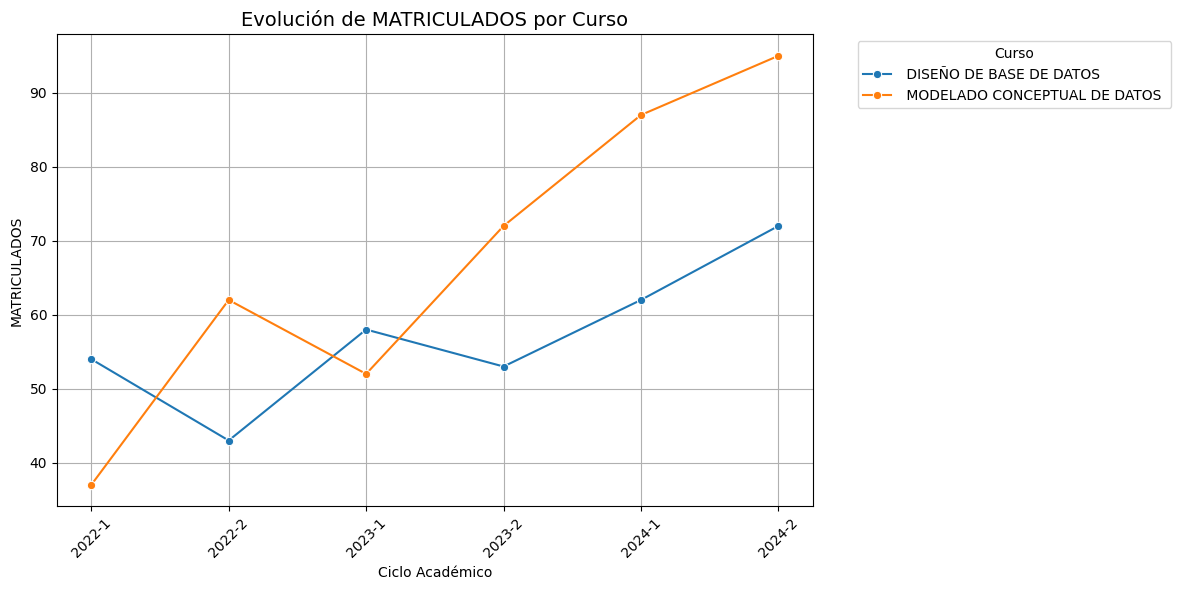

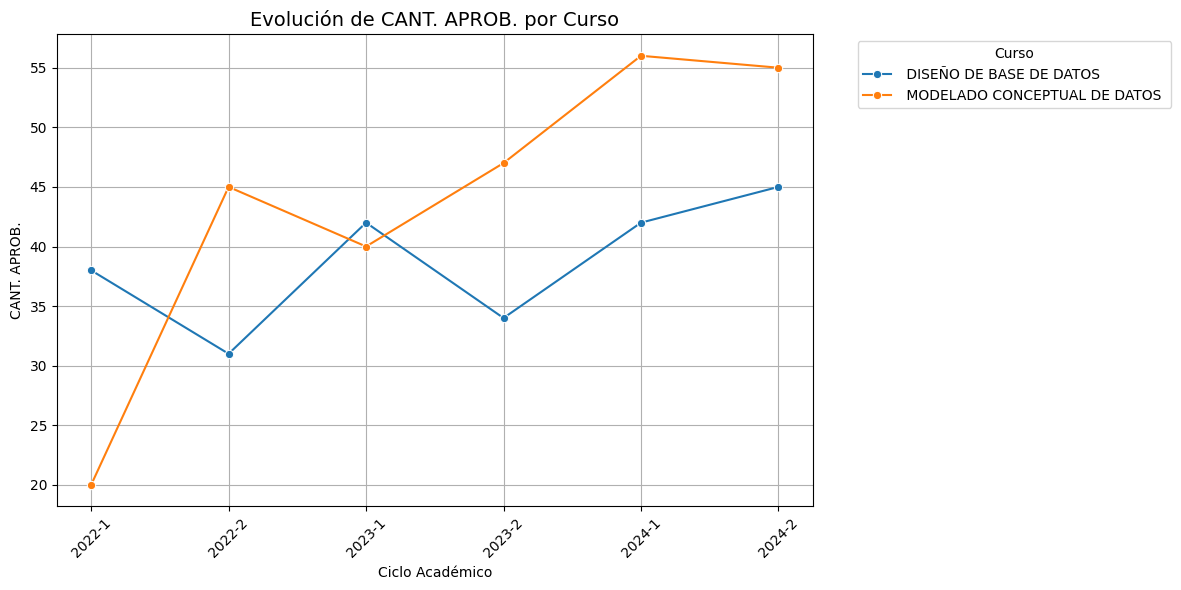

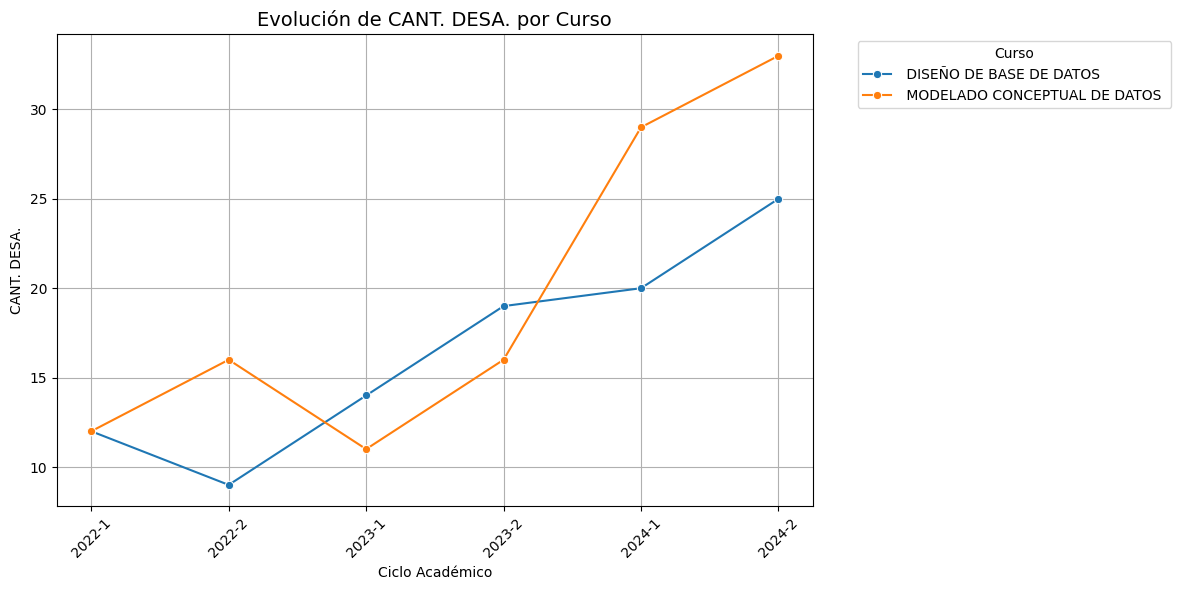

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Filtrar columnas que nos interesan
df_filtered = df[["CICLO", "CURSO", "MATRICULADOS", "CANT. APROB.", "CANT. DESA."]]

# Asegurar que el eje X (CICLO) esté ordenado cronológicamente
# Para eso lo convertimos a tipo categórico con orden personalizado
ciclos_ordenados = sorted(df_filtered["CICLO"].unique())  # orden correcto
df_filtered["CICLO"] = pd.Categorical(df_filtered["CICLO"], categories=ciclos_ordenados, ordered=True)



# Agrupamos por ciclo y curso para sumar valores
df_grouped = df_filtered.groupby(["CICLO", "CURSO"]).sum(numeric_only=True).reset_index()

# ========== 1. Gráfica para cada variable ==========
variables = ["MATRICULADOS", "CANT. APROB.", "CANT. DESA."]
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x="CICLO", y=var, hue="CURSO", marker='o')
    plt.title(f"Evolución de {var} por Curso", fontsize=14)
    plt.xlabel("Ciclo Académico")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title="Curso", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


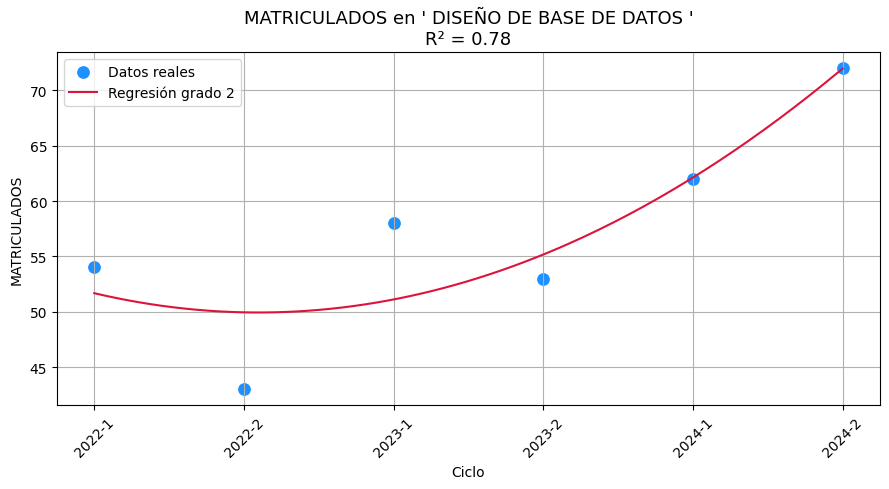

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


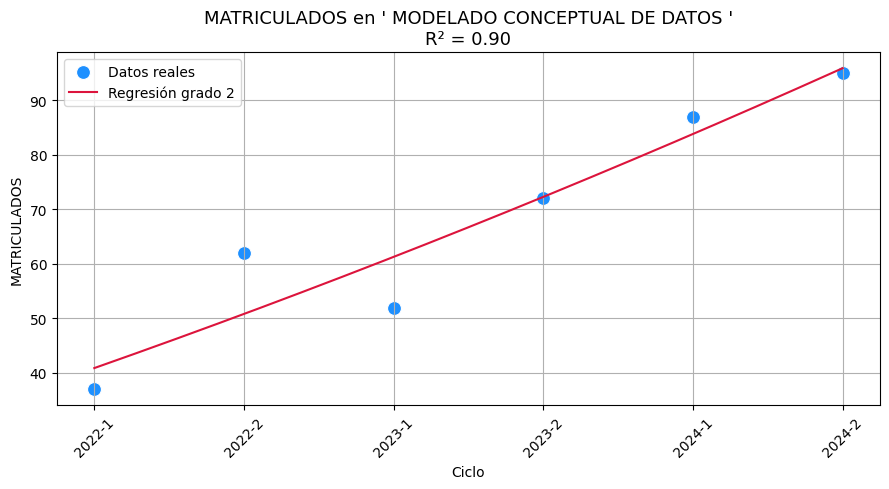

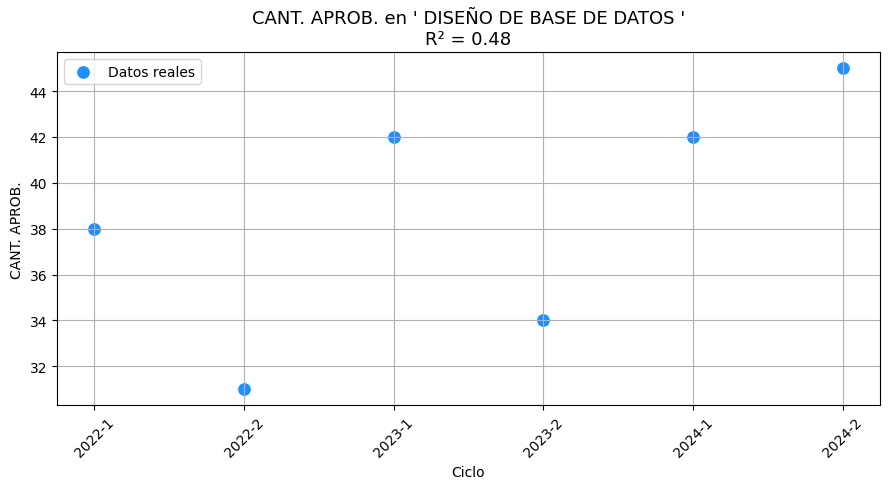

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


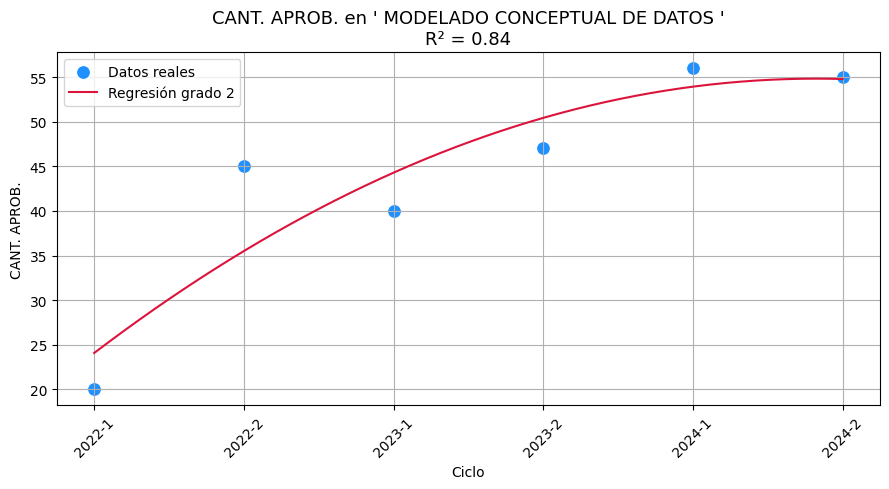

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


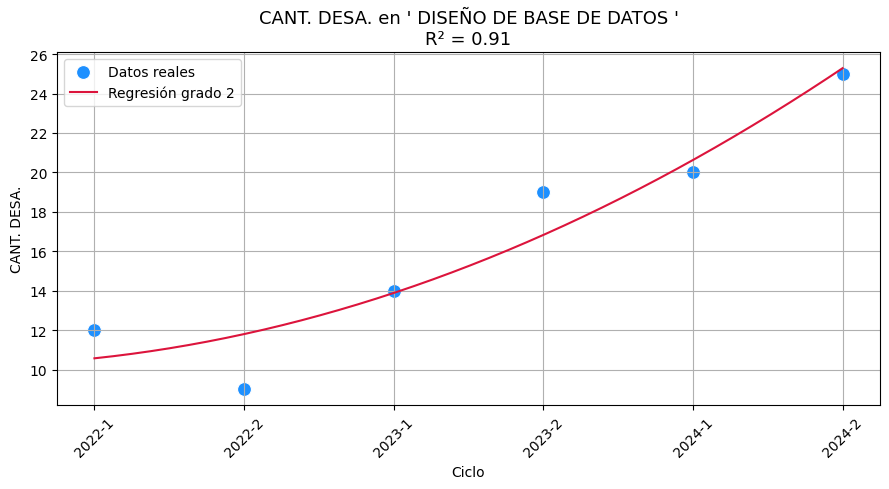

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


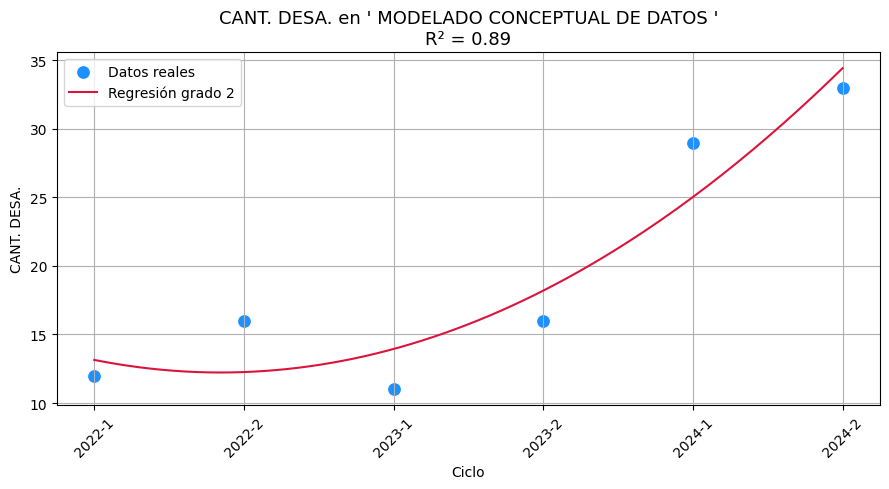

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Variables relevantes
df = df[["CICLO", "CURSO", "MATRICULADOS", "CANT. APROB.", "CANT. DESA."]]

# Ordenar ciclos cronológicamente
ciclos_ordenados = sorted(df["CICLO"].unique(), key=lambda x: (x.split('-')[0], x.split('-')[1]))
ciclo_to_num = {ciclo: i for i, ciclo in enumerate(ciclos_ordenados)}
num_to_ciclo = {i: ciclo for ciclo, i in ciclo_to_num.items()}
df["CICLO_NUM"] = df["CICLO"].map(ciclo_to_num)

# Agrupar por CURSO y CICLO_NUM
df_grouped = df.groupby(["CURSO", "CICLO_NUM"]).agg({
    "MATRICULADOS": "sum",
    "CANT. APROB.": "sum",
    "CANT. DESA.": "sum"
}).reset_index()
df_grouped["CICLO"] = df_grouped["CICLO_NUM"].map(num_to_ciclo)

variables = ["MATRICULADOS", "CANT. APROB.", "CANT. DESA."]
umbral_r2 = 0.5

# ========== GRAFICAR ==========
for variable in variables:
    for curso in df_grouped["CURSO"].unique():  # 🔧 Usar df_grouped, no df
        df_curso = df_grouped[df_grouped["CURSO"] == curso]
        if df_curso.empty:
            continue

        X = df_curso[["CICLO_NUM"]]
        y = df_curso[variable]

        # Regresión polinómica
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)

        # Graficar
        plt.figure(figsize=(9, 5))
        sns.scatterplot(x=df_curso["CICLO_NUM"], y=y, s=100, color="dodgerblue", label="Datos reales")
        plt.title(f"{variable} en '{curso}'\nR² = {r2:.2f}", fontsize=13)
        plt.xlabel("Ciclo")
        plt.ylabel(variable)
        plt.grid(True)

        if r2 >= umbral_r2:
            x_vals = np.linspace(df_curso["CICLO_NUM"].min(), df_curso["CICLO_NUM"].max(), 200).reshape(-1, 1)
            x_vals_poly = poly.transform(x_vals)
            y_vals = model.predict(x_vals_poly)
            plt.plot(x_vals, y_vals, color="crimson", label="Regresión grado 2")

        xticks = sorted(df_curso["CICLO_NUM"].unique())
        xtick_labels = [num_to_ciclo[num] for num in xticks]
        plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

        plt.legend()
        plt.tight_layout()
        plt.show()

📊 MATRICULADOS en  DISEÑO DE BASE DE DATOS  para 2025-1: 84.7


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


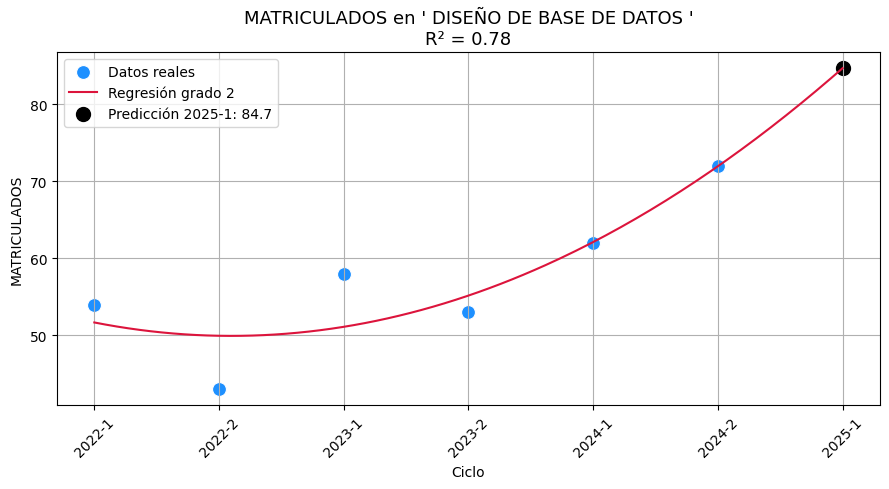

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


📊 MATRICULADOS en  MODELADO CONCEPTUAL DE DATOS  para 2025-1: 108.5


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


⚠️ CANT. APROB. en  DISEÑO DE BASE DE DATOS : R² (0.48) muy bajo para confiar en predicción.


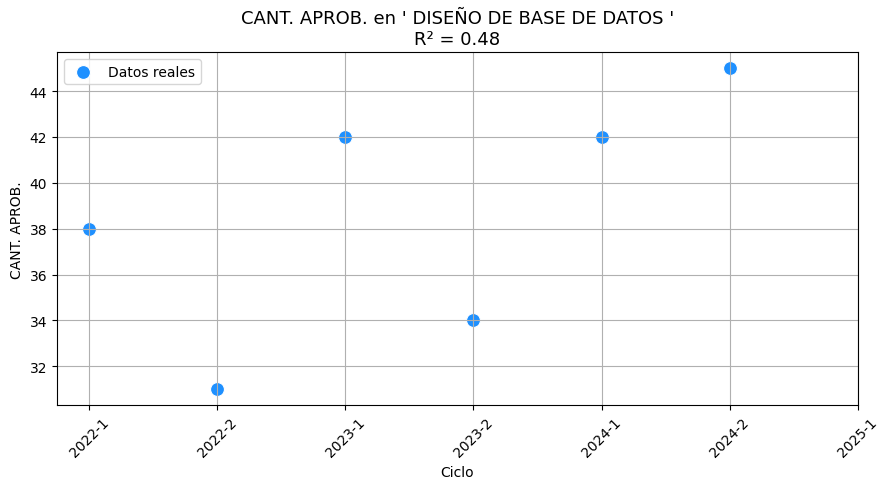

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


📊 CANT. APROB. en  MODELADO CONCEPTUAL DE DATOS  para 2025-1: 53.0


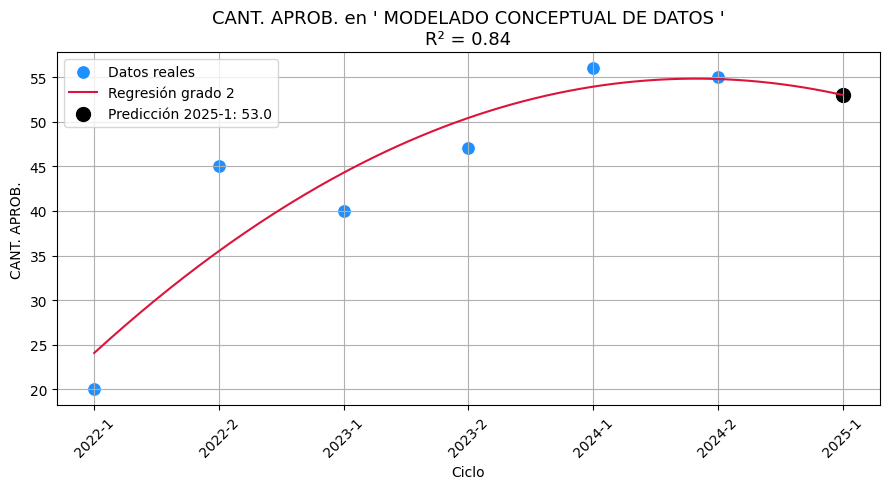

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


📊 CANT. DESA. en  DISEÑO DE BASE DE DATOS  para 2025-1: 30.8


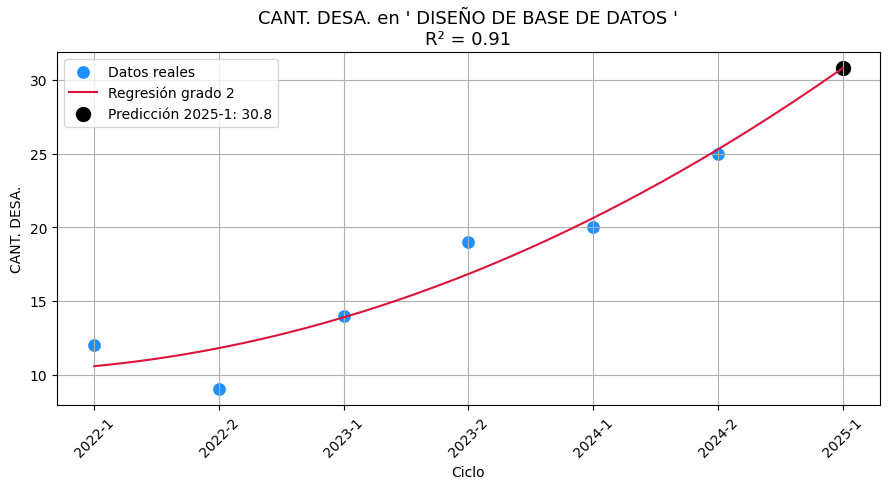

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


📊 CANT. DESA. en  MODELADO CONCEPTUAL DE DATOS  para 2025-1: 46.4


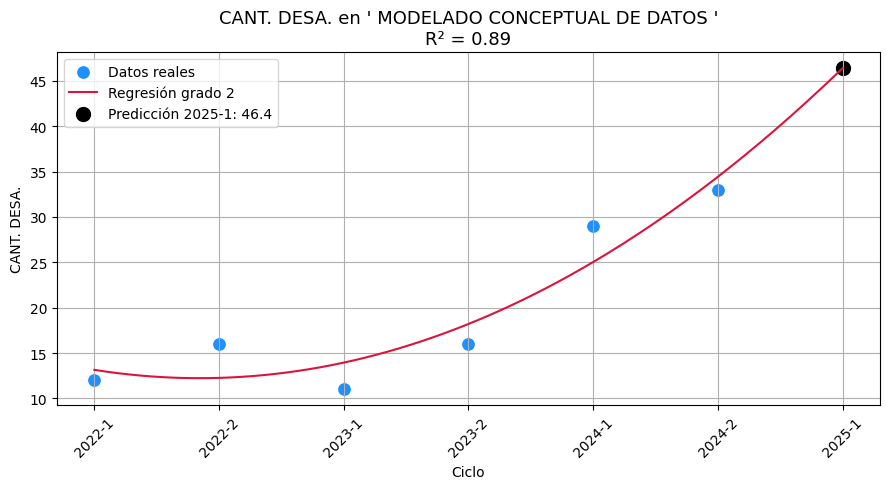

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Variables relevantes
df = df[["CICLO", "CURSO", "MATRICULADOS", "CANT. APROB.", "CANT. DESA."]]

# Ordenar ciclos cronológicamente
ciclos_ordenados = sorted(df["CICLO"].unique(), key=lambda x: (x.split('-')[0], x.split('-')[1]))
if "2025-1" not in ciclos_ordenados:
    ciclos_ordenados.append("2025-1")  # Asegurar que esté incluido
ciclo_to_num = {ciclo: i for i, ciclo in enumerate(ciclos_ordenados)}
num_to_ciclo = {i: ciclo for ciclo, i in ciclo_to_num.items()}
df["CICLO_NUM"] = df["CICLO"].map(ciclo_to_num)

# Agrupar por CURSO y CICLO_NUM
df_grouped = df.groupby(["CURSO", "CICLO_NUM"]).agg({
    "MATRICULADOS": "sum",
    "CANT. APROB.": "sum",
    "CANT. DESA.": "sum"
}).reset_index()
df_grouped["CICLO"] = df_grouped["CICLO_NUM"].map(num_to_ciclo)

variables = ["MATRICULADOS", "CANT. APROB.", "CANT. DESA."]
umbral_r2 = 0.5
ciclo_pred = "2025-1"
ciclo_pred_num = ciclo_to_num[ciclo_pred]

# ========== GRAFICAR Y PREDECIR ==========
for variable in variables:
    for curso in df_grouped["CURSO"].unique():
        df_curso = df_grouped[df_grouped["CURSO"] == curso]
        if df_curso.empty:
            continue

        X = df_curso[["CICLO_NUM"]]
        y = df_curso[variable]

        # Regresión polinómica
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)

        # Predicción para 2025-1
        X_pred = np.array([[ciclo_pred_num]])
        X_pred_poly = poly.transform(X_pred)
        y_pred_2025 = model.predict(X_pred_poly)[0]

        # Gráfico
        plt.figure(figsize=(9, 5))
        sns.scatterplot(x=df_curso["CICLO_NUM"], y=y, s=100, color="dodgerblue", label="Datos reales")
        plt.title(f"{variable} en '{curso}'\nR² = {r2:.2f}", fontsize=13)
        plt.xlabel("Ciclo")
        plt.ylabel(variable)
        plt.grid(True)

        if r2 >= umbral_r2:
            x_vals = np.linspace(df_curso["CICLO_NUM"].min(), ciclo_pred_num, 200).reshape(-1, 1)
            x_vals_poly = poly.transform(x_vals)
            y_vals = model.predict(x_vals_poly)
            plt.plot(x_vals, y_vals, color="crimson", label="Regresión grado 2")

            # Punto predicho
            plt.scatter([ciclo_pred_num], [y_pred_2025], color="black", s=100, label=f"Predicción {ciclo_pred}: {y_pred_2025:.1f}")
            print(f"📊 {variable} en {curso} para {ciclo_pred}: {y_pred_2025:.1f}")
        else:
            print(f"⚠️ {variable} en {curso}: R² ({r2:.2f}) muy bajo para confiar en predicción.")

        xticks = sorted(list(df_curso["CICLO_NUM"].unique()) + [ciclo_pred_num])
        xtick_labels = [num_to_ciclo[num] for num in xticks]
        plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

        plt.legend()
        plt.tight_layout()
        plt.show()

In [17]:
# Pedir CODCUR
codcur_input = input("Ingrese el CODCUR del curso: ").strip().upper()

# Filtrar por el curso ingresado
df_filtrado = df[df["CODCUR"] == codcur_input]

# Agrupar por ciclo para ver evolución en el tiempo
resumen = df_filtrado.groupby("CICLO")[["CANT. APROB.", "CANT. DESA.", "MATRICULADOS"]].sum().reset_index()

print("\nResumen por ciclo:")
print(resumen)


Resumen por ciclo:
    CICLO  CANT. APROB.  CANT. DESA.  MATRICULADOS
0  2022-1            20           12            37
1  2022-2            45           16            62
2  2023-1            40           11            52
3  2023-2            47           16            72
4  2024-1            56           29            87
5  2024-2            55           33            95


In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# === PREPARACIÓN DEL MODELO
X = resumen[["CANT. APROB.", "CANT. DESA."]].values
y = resumen["MATRICULADOS"].values

# Escalar datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# División de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42)

# Red neuronal
model = MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluar
score = model.score(X_test, y_test)
print(f"\n🔍 Precisión del modelo: {score:.4f}")


🔍 Precisión del modelo: 0.9105


In [ ]:
while True:
    try:
        aprobados = int(input("\nIngrese número de aprobados (o -1 para salir): "))
        if aprobados == -1:
            break
        desaprobados = int(input("Ingrese número de desaprobados: "))

        entrada = np.array([[aprobados, desaprobados]])
        entrada_scaled = scaler_X.transform(entrada)
        pred_scaled = model.predict(entrada_scaled)
        pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

        print(f"📊 Predicción de matriculados: {pred[0][0]:.0f}")
    except Exception as e:
        print("⚠️ Error en la entrada. Intente nuevamente. Detalle:", e)

📊 Predicción de matriculados: 71


In [15]:
import pandas as pd

# 1. Crear DataFrame base con la información detallada por sección (vacantes sin agrupar)
df_curso_detallado = df[[
    "CICLO", "CODCUR", "CURSO", "PROFESOR", "MATRICULADOS", "VACANTES",
    "CANT. R. PARCIAL (RP)", "CANT. R. TOTAL (RT)", "CANT. REG. (RW)",
    "CANT. APROB.", "CANT. DESA."
]].copy()

# 2. Agregar columna CANT. RET. (suma de retiros)
df_curso_detallado["CANT. RET."] = (
    df_curso_detallado["CANT. R. PARCIAL (RP)"] +
    df_curso_detallado["CANT. R. TOTAL (RT)"] +
    df_curso_detallado["CANT. REG. (RW)"]
)

# 3. Agregar demanda (suma de matriculados por curso y ciclo)
demanda = df.groupby(["CICLO", "CODCUR"])["MATRICULADOS"].sum().reset_index(name="DEMANDA")
df_curso_detallado = df_curso_detallado.merge(demanda, on=["CICLO", "CODCUR"])

# 4. Agregar cluster de curso
curso_cluster = curso_stats[["CURSO", "CLUSTER"]].rename(columns={"CLUSTER": "CLUSTER_CURSO"})
df_curso_detallado = df_curso_detallado.merge(curso_cluster, on="CURSO", how="left")

# 5. Agregar cluster del profesor
prof_cluster = prof_stats[["PROFESOR", "CLUSTER"]].rename(columns={"CLUSTER": "CLUSTER_PROFESOR"})
df_curso_detallado = df_curso_detallado.merge(prof_cluster, on="PROFESOR", how="left")

# 6. Eliminar columnas innecesarias
df_curso_detallado.drop(columns=[
    "CICLO", "CURSO", "PROFESOR", "CODCUR",
    "CANT. R. PARCIAL (RP)", "CANT. R. TOTAL (RT)", "CANT. REG. (RW)"
], inplace=True)

# 7. Renombrar VACANTES a VACANTES_TOTALES (si deseas mantener coherencia)
df_curso_detallado.rename(columns={"VACANTES": "VACANTES_TOTALES"}, inplace=True)

# 8. Ver resultado
df_curso_detallado.head(99)


MATRICULADOS  VACANTES_TOTALES  CANT. APROB.  CANT. DESA.  CANT. RET.  \
0              6                15             2            2           2   
1             15                15             5            7           3   
2             16                16            13            3           0   
3             19                30             6            9           4   
4             35                35            32            3           0   
5             28                35            13           14           1   
6             34                35            32            2           0   
7             14                25             5            7           2   
8             29                30            26            2           1   
9             21                30            11            9           1   
10            31                32            29            2           0   
11            25                32            13           11           1   
12            33                33            29            3           1   
13            32                36            11           14           7   
14            40                40            36            2           2   
15            24                25             9           15           0   
16            29                30            25            4           0   
17            41                43            13           27           1   
18            46                46            43            2           1   
19            24                35             6           18           0   
20            38                38            36            2           0   
21            19                40             4           10           5   
22            41                41            41            0           0   
23            35                40            10           23           2   
24            32                40            11           19           2   
25            40                41            34            6           0   

    DEMANDA  CLUSTER_CURSO  CLUSTER_PROFESOR  
0        37              1                 0  
1        37              1                 0  
2        37              1                 1  
3        54              0                 0  
4        54              0                 1  
5        62              1                 0  
6        62              1                 1  
7        43              0                 0  
8        43              0                 1  
9        52              1                 0  
10       52              1                 1  
11       58              0                 0  
12       58              0                 1  
13       72              1                 0  
14       72              1                 1  
15       53              0                 0  
16       53              0                 1  
17       87              1                 0  
18       87              1                 1  
19       62              0                 0  
20       62              0                 1  
21       95              1                 0  
22       95              1                 1  
23       95              1                 0  
24       72              0                 0  
25       72              0                 1

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Renombrar el DataFrame
df_prediccion = df_curso_detallado.copy()

# 2. Crear variables dummy para clusters
df_prediccion = pd.get_dummies(df_prediccion, columns=["CLUSTER_CURSO", "CLUSTER_PROFESOR"], drop_first=True)

# 3. Separar variables de entrada (X) y salida (y)
X = df_prediccion.drop(columns=["MATRICULADOS", "CANT. APROB.", "CANT. DESA.", "CANT. RET."])
y = df_prediccion[["MATRICULADOS", "CANT. APROB.", "CANT. DESA.", "CANT. RET."]]

# 4. Escalar las variables de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Crear y compilar modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4)  # Salidas: MATRICULADOS, APROB., DESA., RET.
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 6. Entrenar modelo
history = model.fit(X_scaled, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 7. Evaluar modelo
loss, mae = model.evaluate(X_scaled, y, verbose=0)
print(f"Loss (MSE): {loss:.2f}")
print(f"MAE: {mae:.2f}")

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 351.8756 - mae: 13.6285 - val_loss: 533.2073 - val_mae: 17.2007
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 344.2668 - mae: 13.5151 - val_loss: 531.2180 - val_mae: 17.1693
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 339.5917 - mae: 13.4497 - val_loss: 529.1527 - val_mae: 17.1368
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 353.3084 - mae: 13.5880 - val_loss: 527.0754 - val_mae: 17.1041
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 341.1824 - mae: 13.4482 - val_loss: 524.9920 - val_mae: 17.0714
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 315.2534 - mae: 12.9517 - val_loss: 522.9731 - val_mae: 17.0391
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 322.6196 - mae: 13.0708 - val_loss: 520.9328 - val_mae: 17.0063
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 356.8575 - mae: 13.7172 - val_loss: 518.9235 - val_mae: 16.9744
Epoch 9/100
2/2 ━━━━━━━

In [22]:
# ---------------------------
# 8. INGRESAR VALORES MANUALMENTE
# ---------------------------

print("\n🔢 Ingresa los valores para la predicción:\n")

# Obtener nombres de las columnas originales sin las salidas
columnas_input = X.columns.tolist()
valores_input = []

for col in columnas_input:
    valor = float(input(f"{col}: "))
    valores_input.append(valor)

# Convertir a DataFrame
nueva_muestra = pd.DataFrame([valores_input], columns=columnas_input)

# Escalar con el mismo scaler
nueva_muestra_scaled = scaler.transform(nueva_muestra)

# Predecir
prediccion = model.predict(nueva_muestra_scaled)

# Mostrar resultados
print("\n📊 Predicción:")
print(f"🔹 Matriculados:    {prediccion[0][0]:.0f}")
print(f"🔹 Aprobados:       {prediccion[0][1]:.0f}")
print(f"🔹 Desaprobados:    {prediccion[0][2]:.0f}")
print(f"🔹 Retirados:       {prediccion[0][3]:.0f}")


🔢 Ingresa los valores para la predicción:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

📊 Predicción:
🔹 Matriculados:    58
🔹 Aprobados:       36
🔹 Desaprobados:    15
🔹 Retirados:       2


In [21]:
df_prediccion

MATRICULADOS  VACANTES_TOTALES  CANT. APROB.  CANT. DESA.  CANT. RET.  \
0              6                15             2            2           2   
1             15                15             5            7           3   
2             16                16            13            3           0   
3             19                30             6            9           4   
4             35                35            32            3           0   
5             28                35            13           14           1   
6             34                35            32            2           0   
7             14                25             5            7           2   
8             29                30            26            2           1   
9             21                30            11            9           1   
10            31                32            29            2           0   
11            25                32            13           11           1   
12            33                33            29            3           1   
13            32                36            11           14           7   
14            40                40            36            2           2   
15            24                25             9           15           0   
16            29                30            25            4           0   
17            41                43            13           27           1   
18            46                46            43            2           1   
19            24                35             6           18           0   
20            38                38            36            2           0   
21            19                40             4           10           5   
22            41                41            41            0           0   
23            35                40            10           23           2   
24            32                40            11           19           2   
25            40                41            34            6           0   

    DEMANDA  CLUSTER_CURSO_1  CLUSTER_PROFESOR_1  
0        37             True               False  
1        37             True               False  
2        37             True                True  
3        54            False               False  
4        54            False                True  
5        62             True               False  
6        62             True                True  
7        43            False               False  
8        43            False                True  
9        52             True               False  
10       52             True                True  
11       58            False               False  
12       58            False                True  
13       72             True               False  
14       72             True                True  
15       53            False               False  
16       53            False                True  
17       87             True               False  
18       87             True                True  
19       62            False               False  
20       62            False                True  
21       95             True               False  
22       95             True                True  
23       95             True               False  
24       72            False               False  
25       72            False                True